In [1]:
import pandas as pd
import re
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure
#print(os.listdir("../input"))
#set seed
np.random.seed(12345) # receive the same random numbers each execution
print('setup complete')

setup complete


# Data Pre-processing

In [2]:
#notclean = pd.read_csv("add file path/filename.csv")
notclean.head()

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
0,2019-06-27,0.295890,0.383562,0.320548,1.000000,0.288630,-0.024658,0.381644,0.482854,0.280434,2964.15,2911.43,2913.78
1,2019-06-20,0.295082,0.383607,0.321311,1.000000,0.300425,-0.026229,0.381644,0.482854,0.280434,2931.74,2874.68,2926.46
2,2019-06-13,0.268398,0.389610,0.341991,0.999999,0.305443,-0.073593,0.381644,0.482854,0.280434,2910.61,2800.92,2879.84
3,2019-06-06,0.225275,0.348901,0.425824,1.000000,0.318847,-0.200549,0.381644,0.482854,0.280434,2827.28,2728.81,2826.15
4,2019-05-30,0.247934,0.351240,0.400826,1.000000,0.341048,-0.152892,0.381644,0.482854,0.280434,2868.88,2766.06,2783.02


In [3]:
aaii_sentiment = notclean.drop(['Total','Bullish 8-Week Mov Avg', 'Bull-Bear Spread', 'Bullish Average', 'Bullish Average + St. Dev', 'Bullish Average - St. Dev'], axis=1)
aaii_sentiment.head()

,Date,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
0,2019-06-27,0.295890,0.383562,0.320548,2964.15,2911.43,2913.78
1,2019-06-20,0.295082,0.383607,0.321311,2931.74,2874.68,2926.46
2,2019-06-13,0.268398,0.389610,0.341991,2910.61,2800.92,2879.84
3,2019-06-06,0.225275,0.348901,0.425824,2827.28,2728.81,2826.15
4,2019-05-30,0.247934,0.351240,0.400826,2868.88,2766.06,2783.02


In [4]:
aaii_sentiment = aaii_sentiment.sort_values(by='Date', ascending=True)
aaii_sentiment.head()

,Date,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
1667,1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN
1666,1987-07-17,NaN,NaN,NaN,314.59,307.63,314.59
1665,1987-07-24,0.36,0.50,0.14,311.39,307.81,309.27
1664,1987-07-31,0.26,0.48,0.26,318.66,310.65,318.66
1663,1987-08-07,0.56,0.15,0.29,323.00,316.23,323.00


In [5]:
aaii_sentiment = aaii_sentiment.set_index(pd.DatetimeIndex(aaii_sentiment['Date']))
aaii_sentiment = aaii_sentiment.drop(['Date'], axis=1)
aaii_sentiment.head()

,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,
1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN
1987-07-17,NaN,NaN,NaN,314.59,307.63,314.59
1987-07-24,0.36,0.50,0.14,311.39,307.81,309.27
1987-07-31,0.26,0.48,0.26,318.66,310.65,318.66
1987-08-07,0.56,0.15,0.29,323.00,316.23,323.00


In [ ]:
# sort by index labels  
#sample_df.sort_index(axis = 0)  


# Exploratory Analysis

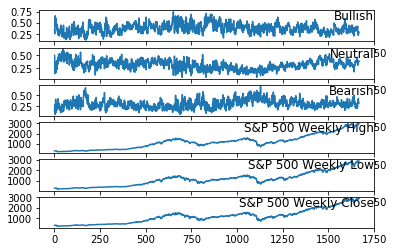

In [6]:
values = aaii_sentiment.values
groups = [0,1,2,3,4,5]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(aaii_sentiment.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [7]:
aaii_sentiment.describe()

,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
count,1665.000000,1665.000000,1665.000000,1667.000000,1667.000000,1667.000000
mean,0.381644,0.315105,0.303250,1177.673953,1147.784578,1164.896940
std,0.101210,0.085244,0.094940,669.505863,651.488897,662.119518
min,0.120000,0.076900,0.060000,233.450000,223.920000,223.920000
25%,0.308869,0.251880,0.234600,558.805000,547.705000,554.365000
50%,0.379000,0.314900,0.291700,1152.450000,1125.720000,1141.010000
75%,0.446064,0.373239,0.359202,1453.540000,1412.520000,1432.965000
max,0.750000,0.620000,0.702700,2964.150000,2912.840000,2927.250000


In [8]:
cor = aaii_sentiment.corr()
cor

,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Bullish,1.000000,-0.492403,-0.623912,0.049979,0.052912,0.053230
Neutral,-0.492403,1.000000,-0.372970,-0.052751,-0.053771,-0.052692
Bearish,-0.623912,-0.372970,1.000000,-0.005913,-0.008123,-0.009431
S&P 500 Weekly High,0.049979,-0.052751,-0.005913,1.000000,0.999371,0.999615
S&P 500 Weekly Low,0.052912,-0.053771,-0.008123,0.999371,1.000000,0.999622
S&P 500 Weekly Close,0.053230,-0.052692,-0.009431,0.999615,0.999622,1.000000


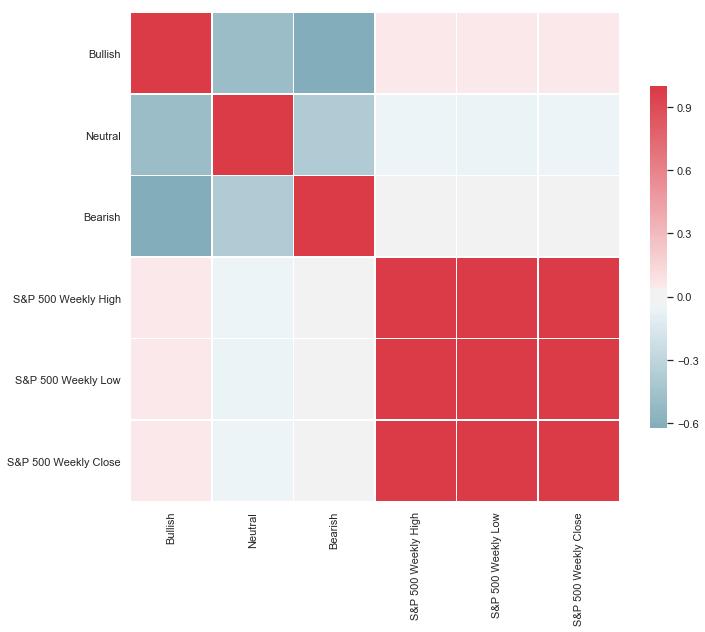

In [9]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

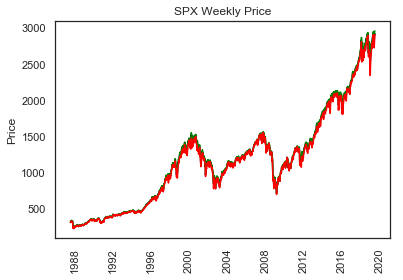

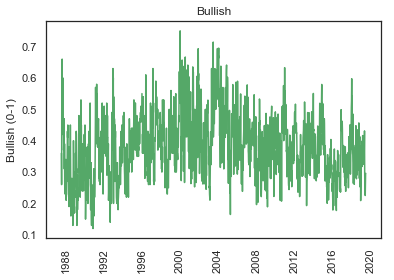

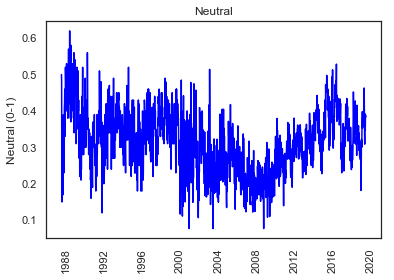

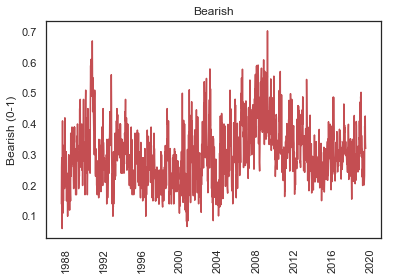

No handles with labels found to put in legend.


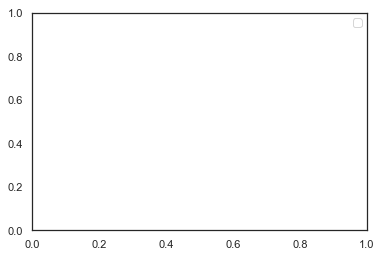

In [47]:
plt.plot(aaii_sentiment.index, aaii_sentiment['S&P 500 Weekly Close'], 'black', label = 'SPX Close')
plt.plot(aaii_sentiment.index, aaii_sentiment['S&P 500 Weekly High'], 'green', label = 'SPX High')
plt.plot(aaii_sentiment.index, aaii_sentiment['S&P 500 Weekly Low'], 'red', label = 'SPX Low')
plt.title('SPX Weekly Price')
plt.xticks(rotation='vertical')
plt.ylabel('Price');
plt.show();

plt.plot(aaii_sentiment.index, aaii_sentiment['Bullish'], 'g')
plt.title('Bullish')
plt.xticks(rotation='vertical')
plt.ylabel('Bullish (0-1)');
plt.show();

plt.plot(aaii_sentiment.index, aaii_sentiment['Neutral'], 'blue')
plt.title('Neutral')
plt.xticks(rotation='vertical')
plt.ylabel('Neutral (0-1)');
plt.show();

plt.plot(aaii_sentiment.index, aaii_sentiment['Bearish'], 'r')
plt.title('Bearish')
plt.xticks(rotation='vertical')
plt.ylabel('Bearish (0-1)');
plt.show();
#plt.legend()

In [12]:
#LSTM Prep
df = aaii_sentiment
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1668 entries, 1987-06-26 to 2019-06-27
Data columns (total 6 columns):
Bullish                 1665 non-null float64
Neutral                 1665 non-null float64
Bearish                 1665 non-null float64
S&P 500 Weekly High     1667 non-null float64
S&P 500 Weekly Low      1667 non-null float64
S&P 500 Weekly Close    1667 non-null float64
dtypes: float64(6)
memory usage: 91.2 KB


In [13]:
df = df.drop(['S&P 500 Weekly High', 'S&P 500 Weekly Low'], axis=1)
df.head()

,Bullish,Neutral,Bearish,S&P 500 Weekly Close
Date,,,,
1987-06-26,NaN,NaN,NaN,NaN
1987-07-17,NaN,NaN,NaN,314.59
1987-07-24,0.36,0.50,0.14,309.27
1987-07-31,0.26,0.48,0.26,318.66
1987-08-07,0.56,0.15,0.29,323.00


In [14]:
df = df[['S&P 500 Weekly Close', 'Bullish', 'Neutral', 'Bearish']]
df.head()

,S&P 500 Weekly Close,Bullish,Neutral,Bearish
Date,,,,
1987-06-26,NaN,NaN,NaN,NaN
1987-07-17,314.59,NaN,NaN,NaN
1987-07-24,309.27,0.36,0.50,0.14
1987-07-31,318.66,0.26,0.48,0.26
1987-08-07,323.00,0.56,0.15,0.29


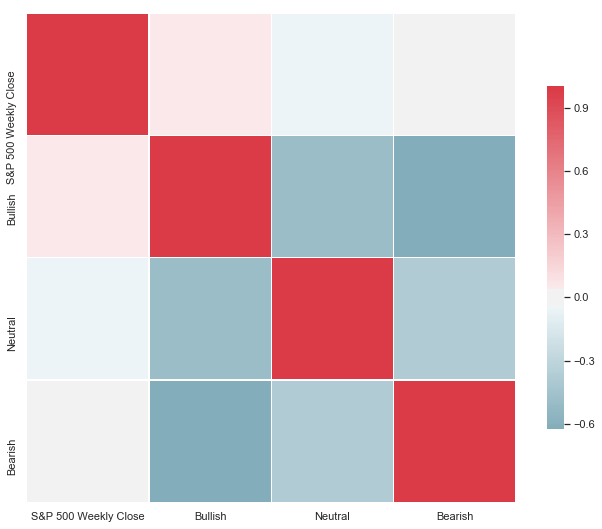

In [15]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink":.7})
plt.show()

In [16]:
aaii_sentiment.median()

Bullish                    0.3790
Neutral                    0.3149
Bearish                    0.2917
S&P 500 Weekly High     1152.4500
S&P 500 Weekly Low      1125.7200
S&P 500 Weekly Close    1141.0100
dtype: float64

# LSTM Model

In [32]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('vars%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [33]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [34]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['S&P 500 Weekly Close', 'Bullish', 'Neutral', 'Bearish']]
df.head()

,S&P 500 Weekly Close,Bullish,Neutral,Bearish
Date,,,,
1987-06-26,NaN,NaN,NaN,NaN
1987-07-17,314.59,NaN,NaN,NaN
1987-07-24,309.27,0.36,0.50,0.14
1987-07-31,318.66,0.26,0.48,0.26
1987-08-07,323.00,0.56,0.15,0.29


In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [36]:
n_days = 7 #adding 7 days lags creating number of observations
n_features = 4 #features in the dataset
n_obs = n_days*n_features

In [37]:
reframed = series_to_supervised(scaled, n_days, 1)
reframed.head()

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),...,var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
9,0.031572,0.380952,0.779046,0.124475,0.035046,0.222222,0.742221,0.311187,0.036651,0.698413,...,0.189836,0.373425,0.034321,0.476190,0.171423,0.544578,0.036274,0.603175,0.281900,0.326747
10,0.035046,0.222222,0.742221,0.311187,0.036651,0.698413,0.134598,0.357865,0.040716,0.523810,...,0.171423,0.544578,0.036274,0.603175,0.281900,0.326747,0.033640,0.761905,0.392377,0.077797
11,0.036651,0.698413,0.134598,0.357865,0.040716,0.523810,0.502854,0.217831,0.041423,0.857143,...,0.281900,0.326747,0.033640,0.761905,0.392377,0.077797,0.035601,0.650794,0.171423,0.373425
12,0.040716,0.523810,0.502854,0.217831,0.041423,0.857143,0.373964,0.000000,0.036666,0.634921,...,0.392377,0.077797,0.035601,0.650794,0.171423,0.373425,0.038527,0.507937,0.337139,0.373425
13,0.041423,0.857143,0.373964,0.000000,0.036666,0.634921,0.189836,0.373425,0.034321,0.476190,...,0.171423,0.373425,0.038527,0.507937,0.337139,0.373425,0.032238,0.539683,0.576505,0.140034


In [38]:
print(reframed.head())

    var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var1(t-6)  var2(t-6)  \
9    0.031572   0.380952   0.779046   0.124475   0.035046   0.222222   
10   0.035046   0.222222   0.742221   0.311187   0.036651   0.698413   
11   0.036651   0.698413   0.134598   0.357865   0.040716   0.523810   
12   0.040716   0.523810   0.502854   0.217831   0.041423   0.857143   
13   0.041423   0.857143   0.373964   0.000000   0.036666   0.634921   

    var3(t-6)  var4(t-6)  var1(t-5)  var2(t-5)  ...  var3(t-2)  var4(t-2)  \
9    0.742221   0.311187   0.036651   0.698413  ...   0.189836   0.373425   
10   0.134598   0.357865   0.040716   0.523810  ...   0.171423   0.544578   
11   0.502854   0.217831   0.041423   0.857143  ...   0.281900   0.326747   
12   0.373964   0.000000   0.036666   0.634921  ...   0.392377   0.077797   
13   0.189836   0.373425   0.034321   0.476190  ...   0.171423   0.373425   

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)  \
9    0.034321   0.476190

In [39]:
values = reframed.values
n_train_days = 1165 #1665*.7
train = values[:n_train_days, :]
test = values[n_train_days:, :]
train.shape

(1165, 32)

In [40]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [41]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1165, 7, 4) (1165,) (486, 7, 4) (486,)


In [42]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))# number of units?, stateful=True?
model.add(Dense(1)) #single output value
model.compile(loss='mae', optimizer='adam', metrics=['mse','mape']) #metrics=['mse', 'mape'] to further check optimal epoch size
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=35, validation_data=(test_X, test_y), verbose=2, shuffle=False, validation_split=0.2)
# plot history, batch_size=n_train_days*.03

Train on 1165 samples, validate on 486 samples
Epoch 1/50
 - 2s - loss: 0.1047 - mean_squared_error: 0.0129 - mean_absolute_percentage_error: 108863.9371 - val_loss: 0.1400 - val_mean_squared_error: 0.0323 - val_mean_absolute_percentage_error: 18.8215
Epoch 2/50
 - 0s - loss: 0.0821 - mean_squared_error: 0.0100 - mean_absolute_percentage_error: 143670.8508 - val_loss: 0.1362 - val_mean_squared_error: 0.0302 - val_mean_absolute_percentage_error: 18.2937
Epoch 3/50
 - 0s - loss: 0.0690 - mean_squared_error: 0.0064 - mean_absolute_percentage_error: 115974.3399 - val_loss: 0.1161 - val_mean_squared_error: 0.0226 - val_mean_absolute_percentage_error: 15.5384
Epoch 4/50
 - 0s - loss: 0.0573 - mean_squared_error: 0.0046 - mean_absolute_percentage_error: 97864.5188 - val_loss: 0.0936 - val_mean_squared_error: 0.0151 - val_mean_absolute_percentage_error: 12.7282
Epoch 5/50
 - 0s - loss: 0.0458 - mean_squared_error: 0.0031 - mean_absolute_percentage_error: 81166.0302 - val_loss: 0.0766 - val_mea

Epoch 41/50
 - 0s - loss: 0.0103 - mean_squared_error: 1.9030e-04 - mean_absolute_percentage_error: 3655.4064 - val_loss: 0.0436 - val_mean_squared_error: 0.0038 - val_mean_absolute_percentage_error: 5.8885
Epoch 42/50
 - 0s - loss: 0.0103 - mean_squared_error: 1.9076e-04 - mean_absolute_percentage_error: 3850.4316 - val_loss: 0.0428 - val_mean_squared_error: 0.0037 - val_mean_absolute_percentage_error: 5.8161
Epoch 43/50
 - 0s - loss: 0.0103 - mean_squared_error: 1.8998e-04 - mean_absolute_percentage_error: 4350.1309 - val_loss: 0.0419 - val_mean_squared_error: 0.0035 - val_mean_absolute_percentage_error: 5.6997
Epoch 44/50
 - 0s - loss: 0.0104 - mean_squared_error: 1.9466e-04 - mean_absolute_percentage_error: 5931.7873 - val_loss: 0.0408 - val_mean_squared_error: 0.0033 - val_mean_absolute_percentage_error: 5.6211
Epoch 45/50
 - 0s - loss: 0.0106 - mean_squared_error: 1.9872e-04 - mean_absolute_percentage_error: 6175.1211 - val_loss: 0.0399 - val_mean_squared_error: 0.0032 - val_mean

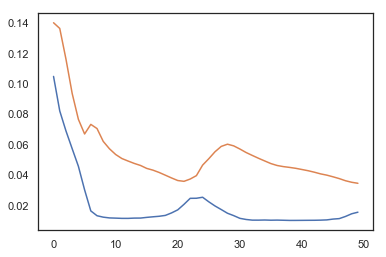

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend
plt.show()

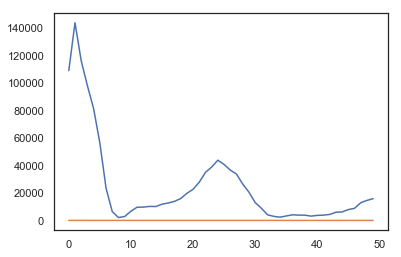

In [44]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='test')
plt.legend
plt.show()

In [45]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days * n_features,))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -3:]), axis=1) #-3 for number of features (4-3=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae =(mean_absolute_error(inv_y, inv_yhat))
print('Test MAE: %.3f' % mae)
mape =(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % mape)

Test MSE: 16680.376
Test RMSE: 129.153
Test MAE: 93.512
Test MAPE: 4.407


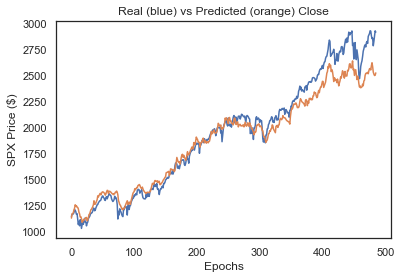

In [46]:
plt.plot(inv_y, label='Real') #blue
plt.plot(inv_yhat, label='Predicted') #orange
plt.title('Real (blue) vs Predicted (orange) Close')
plt.ylabel('SPX Price ($)')
plt.xlabel('Epochs')
plt.show()